# Importing necessary libraries and data fetching

In [11]:
# importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import seaborn as sns

In [13]:
# importing classifiers and training utils
import os
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from wordcloud import WordCloud

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

In [87]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
df_train = pd.read_csv('/content/drive/MyDrive/EC3M2/datasets/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/EC3M2/datasets/test.csv')


# Data Processing

## Data Cleaning

In [4]:
df_train.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [5]:
df_test.head(10)

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
5,20805,Trump is USA's antique hero. Clinton will be n...,NaN,Trump is USA's antique hero. Clinton will be n...
6,20806,Pelosi Calls for FBI Investigation to Find Out...,Pam Key,"Sunday on NBC’s “Meet the Press,” House Minori..."
7,20807,Weekly Featured Profile – Randy Shannon,Trevor Loudon,You are here: Home / *Articles of the Bound* /...
8,20808,Urban Population Booms Will Make Climate Chang...,NaN,Urban Population Booms Will Make Climate Chang...
9,20809,NaN,cognitive dissident,don't we have the receipt?


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [7]:
#removing null values
df_train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [8]:
df_train=df_train.fillna(" ")

In [9]:
df_train.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20800 non-null  object
 2   author  20800 non-null  object
 3   text    20800 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [14]:
#removing unwanted columns
df_train.drop(columns = 'id',axis=1,inplace=True)

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   20800 non-null  object
 1   author  20800 non-null  object
 2   text    20800 non-null  object
 3   label   20800 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 650.1+ KB


## Data Preprocessing

In [16]:
#merging columns
df_train['news']=df_train['author']+':'+df_train['title']

In [17]:
df_train.head(10)

,title,author,text,label,news
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus:House Dem Aide: We Didn’t Even S...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn:FLYNN: Hillary Clinton, Big Wo..."
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com:Why the Truth Might Get You...
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss:15 Civilians Killed In Single ...
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy:Iranian woman jailed for fictio...
5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0,Daniel Nussbaum:Jackie Mason: Hollywood Would ...
6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,,Ever wonder how Britain’s most iconic pop pian...,1,:Life: Life Of Luxury: Elton John’s 6 Favorit...
7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0,Alissa J. Rubin:Benoît Hamon Wins French Socia...
8,Excerpts From a Draft Script for Donald Trump’...,,Donald J. Trump is scheduled to make a highly ...,0,:Excerpts From a Draft Script for Donald Trum...
9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0,Megan Twohey and Scott Shane:A Back-Channel Pl...


In [18]:
# df_train.drop(columns = ['text','author'],axis=1,inplace=True)

In [19]:
df_train.head(10)

,title,author,text,label,news
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus:House Dem Aide: We Didn’t Even S...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn:FLYNN: Hillary Clinton, Big Wo..."
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com:Why the Truth Might Get You...
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss:15 Civilians Killed In Single ...
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy:Iranian woman jailed for fictio...
5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0,Daniel Nussbaum:Jackie Mason: Hollywood Would ...
6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,,Ever wonder how Britain’s most iconic pop pian...,1,:Life: Life Of Luxury: Elton John’s 6 Favorit...
7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0,Alissa J. Rubin:Benoît Hamon Wins French Socia...
8,Excerpts From a Draft Script for Donald Trump’...,,Donald J. Trump is scheduled to make a highly ...,0,:Excerpts From a Draft Script for Donald Trum...
9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0,Megan Twohey and Scott Shane:A Back-Channel Pl...


In [30]:
## training on author + text data
df_train['newstext'] = df_train['author'] + ' : ' + df_train['text']

In [31]:
X_text, Y_text = df_train['newstext'].values, df_train['label'].values

In [20]:
X = df_train['news'].values
Y = df_train['label'].values

In [21]:
type(df_train['news'].values)

numpy.ndarray

## Data Visualization

In [22]:
print(X)

['Darrell Lucus:House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'
 'Daniel J. Flynn:FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'
 'Consortiumnews.com:Why the Truth Might Get You Fired' ...
 'Michael J. de la Merced and Rachel Abrams:Macy’s Is Said to Receive Takeover Approach by Hudson’s Bay - The New York Times'
 'Alex Ansary:NATO, Russia To Hold Parallel Exercises In Balkans'
 'David Swanson:What Keeps the F-35 Alive']


In [23]:
print(Y)

[1 0 1 ... 0 1 1]


In [24]:
X.shape

(20800,)

In [25]:
Y.shape

(20800,)

In [29]:
wordcloud = WordCloud(width = 3000, height=2000,background_color = 'white').generate(" ".join(df_train['news']))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k'
)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [32]:
wordcloud = WordCloud(width = 3000, height=2000,background_color = 'white').generate(" ".join(df_train['newstext']))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k'
)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Word Embeddings : Count Vectorization

In [33]:
vectorizer = CountVectorizer()

vectorizer.fit(X)

CountVectorizer()

In [34]:
vectorizer_text = CountVectorizer()

In [35]:
X_text = vectorizer_text.fit_transform(X_text)

In [36]:
type(X)

numpy.ndarray

In [37]:
X=vectorizer.transform(X)

In [38]:
print(X)

  (0, 904)	1
  (0, 3862)	1
  (0, 4507)	1
  (0, 5508)	1
  (0, 5800)	1
  (0, 6145)	1
  (0, 7574)	1
  (0, 10387)	1
  (0, 11307)	1
  (0, 11409)	1
  (0, 12528)	1
  (0, 12902)	1
  (0, 19171)	1
  (0, 22289)	1
  (0, 22649)	1
  (0, 23355)	1
  (1, 2544)	1
  (1, 3075)	1
  (1, 3509)	1
  (1, 4298)	1
  (1, 5469)	1
  (1, 8420)	2
  (1, 10134)	1
  (1, 15149)	1
  (1, 23748)	1
  :	:
  (20797, 17253)	1
  (20797, 17550)	1
  (20797, 18720)	1
  (20797, 21266)	1
  (20797, 21564)	1
  (20797, 21736)	1
  (20797, 21775)	1
  (20797, 23989)	1
  (20798, 1009)	1
  (20798, 1324)	1
  (20798, 2068)	1
  (20798, 7676)	1
  (20798, 10228)	1
  (20798, 10764)	1
  (20798, 14500)	1
  (20798, 15626)	1
  (20798, 18626)	1
  (20798, 21775)	1
  (20799, 270)	1
  (20799, 1043)	1
  (20799, 5537)	1
  (20799, 11815)	1
  (20799, 21101)	1
  (20799, 21564)	1
  (20799, 23493)	1


## Data Splitting for training and validation

In [39]:
# splitting the data to train and test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [40]:
X_text_train, X_text_test, Y_text_train, Y_text_test = train_test_split(X_text, Y_text, test_size=0.2)

# Model Training & Evaluation

- model
- score
- confusion matrix
- classification report
- ROC Curve
- export

## Logistic Regression


In [41]:
# model - logistic regression
regressor=LogisticRegression()
regressor.fit(X_train,Y_train)

LogisticRegression()

In [42]:
regressor.score(X_test,Y_test)

0.9915865384615384

In [44]:
lr_predict = regressor.predict(X_test)

In [45]:
accuracy_score(lr_predict,Y_test)

0.9915865384615384

In [46]:
X_new = X_test[150]


prediction = regressor.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')


[0]
The news is Real


In [47]:
print(confusion_matrix(Y_test,lr_predict))

[[2065   27]
 [   8 2060]]


In [97]:
print("Confusion matrix of logistic regreesion with text: \n", confusion_matrix(Y_text_test,loaded_text_model.predict(X_text_test)))

Confusion matrix of logistic regreesion with text: 
 [[2014   74]
 [  63 2009]]


In [48]:
# exporting the model
os.mkdir("./models")
filename='./models/logreg.sav'
pickle.dump(regressor,open(filename,'wb'))

In [49]:
loaded_model=pickle.load(open('./models/logreg.sav','rb'))

In [50]:
# saving the vectorizer
os.mkdir("./vectorizer")
filename='./vectorizer/author_title.sav'
pickle.dump(vectorizer,open(filename,'wb'))

In [51]:
loaded_vectorizer = pickle.load(open('./vectorizer/author_title.sav','rb'))

In [52]:
X_new = X_test[150]
print(type(X_new))
prediction = loaded_model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

<class 'scipy.sparse._csr.csr_matrix'>
[0]
The news is Real


In [53]:
X_new=['Biden, a Democrat from Delaware who previously served as vice president under Barack Obama, took office following his victory in the 2020 presidential election over Republican incumbent president Donald Trump. Upon his inauguration, he became the oldest president in American history.']

In [54]:
type(X_new)

list

In [55]:

X_new=loaded_vectorizer.transform(X_new)
type(X_new)

scipy.sparse._csr.csr_matrix

In [56]:
prediction = loaded_model.predict(X_new)

In [57]:
if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

The news is Real


In [58]:
fake_test ="Massachusetts Cop’s Wife Busted for Pinning Fake Home-Invasion Robbery on Black Lives Matter Source: PINAC The wife of a Massachusetts cop is facing charges for filing a false police report after she concocted a story about thieves ransacking her home, stealing $10,000 in jewelry and then spray-painting her house with Black Lives Matter to pin it on black people. Maria Daly, wife of Millbury K-9 cop Daniel Daly, took to social media about her dreamt-up victimization after she filed a police report on October 17. “We woke up to not only our house being robbed while we were sleeping, but to see this hatred for no reason,” she posted, according to the Boston Herald. “ If you would of [sic] asked me yesterday about this blue lives and black lives matter issue my response would of [sic] been very positive [sic],” the now private Facebook account alleged. “Today on the other hand I have so much anger and hate that I don’t like myself. This is what we have to deal with these days and it makes me sick that this is what was on the side of my house.” Maria Daly called police to report someone had robbed her home while she was sleeping and then spray-painted her home with BLM for Black Lives Matter then posted about it on social media. Millbury Police Chief Donald Desourcy told the Herald that Daly called police to report an early morning break-in October 17, claiming someone had made off with thousands of dollars worth of valuables and spray-painting “BLM” on the outside of her house. But Chief Desourcy stated that as the investigation unfolded, something didn’t feel “quite right” and Daly ended up admitting she fabricated the whole thing, telling the officers her valuables had already been recovered. “It was pretty obvious. The officers did their due diligence and followed through with the investigation that we had,” he told CBS Boston . “We came to the conclusion it was all fabricated. There was no intruder, there was no burglary.” The chief said the hoax was likely motivated by the couple’s financial troubles and that he has empathy for the family. “I’m very familiar with her and it’s an unfortunate set of circumstances that have taken place.” Daly’s neighbors said it wasn’t a very smart thing to do for a woman who is married to a cop. “She must have tagged the place herself,” said one neighbor. “I don’t know why you’d do that, if you’re gonna stage a robbery, I mean really come on, you’re a cop’s wife. You should know better.” In addition to charges for filing a false police report, Daly also faces a charge for misleading a police investigation. Her cases will be heard at Worcester District Court after she is summoned. Daly’s husband, Daniel Daly was not involved or charged in relation to the hoax, according to police. Share This Article..."
inp = loaded_vectorizer.transform([fake_test])

prediction = loaded_model.predict(inp)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

The news is Fake


In [65]:
logreg_text = LogisticRegression(max_iter=1000)

In [66]:
logreg_text.fit(X_text_train, Y_text_train)

LogisticRegression(max_iter=1000)

In [67]:
logreg_text.score(X_text_test, Y_text_test)

0.9670673076923076

In [68]:
# export new model
pickle.dump(logreg_text, open('./models/logreg_text.sav','wb'))

In [69]:
#export new vectorizer
pickle.dump(vectorizer_text, open('./vectorizer/author_text.sav','wb'))

In [70]:
# now load the saved models for testing
loaded_text_model = pickle.load(open('./models/logreg_text.sav','rb'))
loaded_text_vectorizer = pickle.load(open('./vectorizer/author_text.sav','rb'))

In [71]:
loaded_text_model.predict(X_text_test[120]) == Y_text_test[120]

array([ True])

In [92]:
print("classification report of logistic regression: \n\n",classification_report(Y_test, lr_predict))

classification report of logistic regression: 

               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2092
           1       0.99      1.00      0.99      2068

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



In [93]:
print("classification report of logistic regression with text : \n\n",classification_report(Y_text_test, logreg_text.predict(X_text_test)))

classification report of logistic regression with text : 

               precision    recall  f1-score   support

           0       0.97      0.96      0.97      2088
           1       0.96      0.97      0.97      2072

    accuracy                           0.97      4160
   macro avg       0.97      0.97      0.97      4160
weighted avg       0.97      0.97      0.97      4160



Text(0.5, 1.0, 'logistic regression')

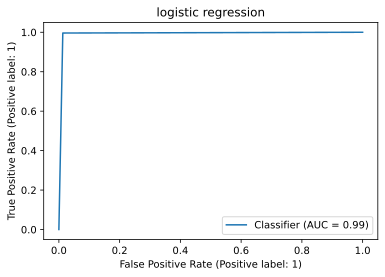

In [95]:
RocCurveDisplay.from_predictions(Y_test, lr_predict)
plt.title("logistic regression")

Text(0.5, 1.0, 'logistic regression with text')

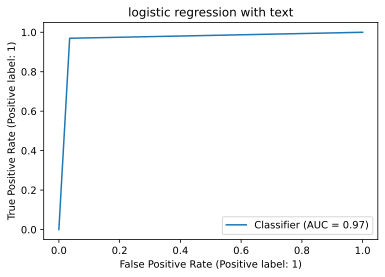

In [96]:
RocCurveDisplay.from_predictions(Y_text_test, logreg_text.predict(X_text_test))
plt.title("logistic regression with text")

## Decision Tree

In [73]:
tree = DecisionTreeClassifier()
tree.fit(X_train,Y_train)
tree.score(X_test, Y_test)

0.9959134615384615

In [77]:
tree_text = DecisionTreeClassifier()
tree_text.fit(X_text_train, Y_text_train)
tree_text.score(X_text_test, Y_text_test)

0.9192307692307692

In [78]:
# exporting models
filename='./models/tree.sav'
pickle.dump(tree,open(filename,'wb'))
pickle.dump(tree_text, open('./models/tree_text.sav','wb'))

In [79]:
loaded_tree=pickle.load(open('./models/tree.sav','rb'))
loaded_text_tree = pickle.load(open('./models/tree_text.sav','rb'))

In [80]:
fake_test ="Massachusetts Cop’s Wife Busted for Pinning Fake Home-Invasion Robbery on Black Lives Matter Source: PINAC The wife of a Massachusetts cop is facing charges for filing a false police report after she concocted a story about thieves ransacking her home, stealing $10,000 in jewelry and then spray-painting her house with Black Lives Matter to pin it on black people. Maria Daly, wife of Millbury K-9 cop Daniel Daly, took to social media about her dreamt-up victimization after she filed a police report on October 17. “We woke up to not only our house being robbed while we were sleeping, but to see this hatred for no reason,” she posted, according to the Boston Herald. “ If you would of [sic] asked me yesterday about this blue lives and black lives matter issue my response would of [sic] been very positive [sic],” the now private Facebook account alleged. “Today on the other hand I have so much anger and hate that I don’t like myself. This is what we have to deal with these days and it makes me sick that this is what was on the side of my house.” Maria Daly called police to report someone had robbed her home while she was sleeping and then spray-painted her home with BLM for Black Lives Matter then posted about it on social media. Millbury Police Chief Donald Desourcy told the Herald that Daly called police to report an early morning break-in October 17, claiming someone had made off with thousands of dollars worth of valuables and spray-painting “BLM” on the outside of her house. But Chief Desourcy stated that as the investigation unfolded, something didn’t feel “quite right” and Daly ended up admitting she fabricated the whole thing, telling the officers her valuables had already been recovered. “It was pretty obvious. The officers did their due diligence and followed through with the investigation that we had,” he told CBS Boston . “We came to the conclusion it was all fabricated. There was no intruder, there was no burglary.” The chief said the hoax was likely motivated by the couple’s financial troubles and that he has empathy for the family. “I’m very familiar with her and it’s an unfortunate set of circumstances that have taken place.” Daly’s neighbors said it wasn’t a very smart thing to do for a woman who is married to a cop. “She must have tagged the place herself,” said one neighbor. “I don’t know why you’d do that, if you’re gonna stage a robbery, I mean really come on, you’re a cop’s wife. You should know better.” In addition to charges for filing a false police report, Daly also faces a charge for misleading a police investigation. Her cases will be heard at Worcester District Court after she is summoned. Daly’s husband, Daniel Daly was not involved or charged in relation to the hoax, according to police. Share This Article..."
inp = loaded_vectorizer.transform([fake_test])

In [81]:
loaded_tree.predict(inp)

array([1])

In [84]:
loaded_text_tree.predict(loaded_text_vectorizer.transform(df_train['newstext'][:2]))

array([1, 0])

In [85]:
print("Tree:")
print(confusion_matrix(Y_test, loaded_tree.predict(X_test)))
print("Tree with text data:")
print(confusion_matrix(Y_text_test, loaded_text_tree.predict(X_text_test)))

Tree:
[[2084    8]
 [   9 2059]]
Tree with text data:
[[1899  189]
 [ 147 1925]]


In [130]:
# comparision reports
print("Classification report of tree:\n\n", classification_report(Y_test, loaded_tree.predict(X_test)))
print("\n")
print("Classification report of tree with text:\n\n", classification_report(Y_text_test, loaded_text_tree.predict(X_text_test)))

Classification report of tree:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2092
           1       1.00      1.00      1.00      2068

    accuracy                           1.00      4160
   macro avg       1.00      1.00      1.00      4160
weighted avg       1.00      1.00      1.00      4160



Classification report of tree with text:

               precision    recall  f1-score   support

           0       0.93      0.91      0.92      2088
           1       0.91      0.93      0.92      2072

    accuracy                           0.92      4160
   macro avg       0.92      0.92      0.92      4160
weighted avg       0.92      0.92      0.92      4160



Text(0.5, 1.0, 'Tree')

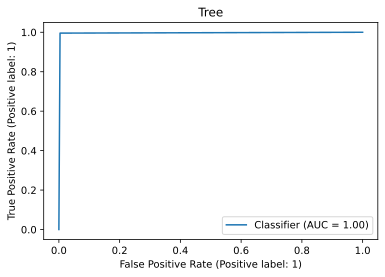

In [100]:
# Plotting ROC Curves
RocCurveDisplay.from_predictions(Y_test, loaded_tree.predict(X_test))
plt.title("Tree")

Text(0.5, 1.0, 'Tree with text')

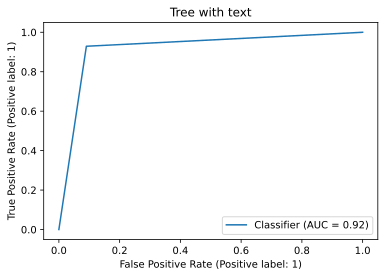

In [102]:
RocCurveDisplay.from_predictions(Y_text_test, loaded_text_tree.predict(X_text_test))
plt.title("Tree with text")

## KNN

In [107]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
knn.score(X_test, Y_test)

0.8149038461538461

In [109]:
knn_text = KNeighborsClassifier()
knn_text.fit(X_text_train, Y_text_train)
knn_text.score(X_text_test, Y_text_test)

0.8473557692307693

In [110]:
# exporting models
filename='./models/knn.sav'
pickle.dump(knn,open(filename,'wb'))
pickle.dump(knn_text, open('./models/knn_text.sav','wb'))

In [111]:
loaded_knn=pickle.load(open('./models/knn.sav','rb'))
loaded_text_knn = pickle.load(open('./models/knn_text.sav','rb'))

In [112]:
fake_test ="Massachusetts Cop’s Wife Busted for Pinning Fake Home-Invasion Robbery on Black Lives Matter Source: PINAC The wife of a Massachusetts cop is facing charges for filing a false police report after she concocted a story about thieves ransacking her home, stealing $10,000 in jewelry and then spray-painting her house with Black Lives Matter to pin it on black people. Maria Daly, wife of Millbury K-9 cop Daniel Daly, took to social media about her dreamt-up victimization after she filed a police report on October 17. “We woke up to not only our house being robbed while we were sleeping, but to see this hatred for no reason,” she posted, according to the Boston Herald. “ If you would of [sic] asked me yesterday about this blue lives and black lives matter issue my response would of [sic] been very positive [sic],” the now private Facebook account alleged. “Today on the other hand I have so much anger and hate that I don’t like myself. This is what we have to deal with these days and it makes me sick that this is what was on the side of my house.” Maria Daly called police to report someone had robbed her home while she was sleeping and then spray-painted her home with BLM for Black Lives Matter then posted about it on social media. Millbury Police Chief Donald Desourcy told the Herald that Daly called police to report an early morning break-in October 17, claiming someone had made off with thousands of dollars worth of valuables and spray-painting “BLM” on the outside of her house. But Chief Desourcy stated that as the investigation unfolded, something didn’t feel “quite right” and Daly ended up admitting she fabricated the whole thing, telling the officers her valuables had already been recovered. “It was pretty obvious. The officers did their due diligence and followed through with the investigation that we had,” he told CBS Boston . “We came to the conclusion it was all fabricated. There was no intruder, there was no burglary.” The chief said the hoax was likely motivated by the couple’s financial troubles and that he has empathy for the family. “I’m very familiar with her and it’s an unfortunate set of circumstances that have taken place.” Daly’s neighbors said it wasn’t a very smart thing to do for a woman who is married to a cop. “She must have tagged the place herself,” said one neighbor. “I don’t know why you’d do that, if you’re gonna stage a robbery, I mean really come on, you’re a cop’s wife. You should know better.” In addition to charges for filing a false police report, Daly also faces a charge for misleading a police investigation. Her cases will be heard at Worcester District Court after she is summoned. Daly’s husband, Daniel Daly was not involved or charged in relation to the hoax, according to police. Share This Article..."
inp = loaded_vectorizer.transform([fake_test])
loaded_knn.predict(inp)

array([1])

In [113]:
loaded_text_knn.predict(loaded_text_vectorizer.transform(df_train['newstext'][:2]))

array([1, 0])

In [114]:
print("KNN:")
print(confusion_matrix(Y_test, loaded_knn.predict(X_test)))
print("KNN with text data:")
print(confusion_matrix(Y_text_test, loaded_text_knn.predict(X_text_test)))

KNN:
[[1326  766]
 [   4 2064]]
KNN with text data:
[[1666  422]
 [ 213 1859]]


In [129]:
# comparision reports
print("Classification report of KNN:\n\n", classification_report(Y_test, loaded_knn.predict(X_test)))
print("\n")
print("Classification report of KNN with text:\n\n", classification_report(Y_text_test, loaded_text_knn.predict(X_text_test)))

Classification report of KNN:

               precision    recall  f1-score   support

           0       1.00      0.63      0.77      2092
           1       0.73      1.00      0.84      2068

    accuracy                           0.81      4160
   macro avg       0.86      0.82      0.81      4160
weighted avg       0.86      0.81      0.81      4160



Classification report of KNN with text:

               precision    recall  f1-score   support

           0       0.89      0.80      0.84      2088
           1       0.81      0.90      0.85      2072

    accuracy                           0.85      4160
   macro avg       0.85      0.85      0.85      4160
weighted avg       0.85      0.85      0.85      4160



Text(0.5, 1.0, 'KNN')

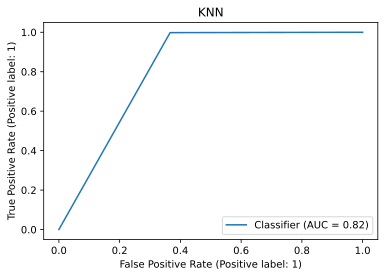

In [116]:
# Plotting ROC Curves
RocCurveDisplay.from_predictions(Y_test, loaded_knn.predict(X_test))
plt.title("KNN")

Text(0.5, 1.0, 'KNN with text')

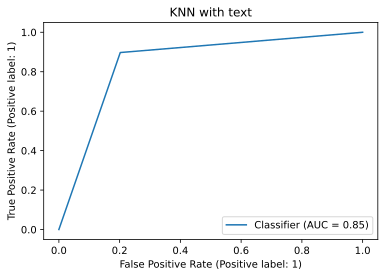

In [117]:
RocCurveDisplay.from_predictions(Y_text_test, loaded_text_knn.predict(X_text_test))
plt.title("KNN with text")

## Naïve Bayes

In [118]:
NB = BernoulliNB()
NB.fit(X_train, Y_train)
NB.score(X_test, Y_test)

0.9824519230769231

In [119]:
NB_text = BernoulliNB()
NB_text.fit(X_text_train, Y_text_train)
NB_text.score(X_text_test, Y_text_test)

0.7759615384615385

In [120]:
# exporting models
filename='./models/NB.sav'
pickle.dump(knn,open(filename,'wb'))
pickle.dump(knn_text, open('./models/NB_text.sav','wb'))

In [121]:
loaded_NB = pickle.load(open('./models/NB.sav','rb'))
loaded_text_NB = pickle.load(open('./models/NB_text.sav','rb'))

In [122]:
fake_test ="Massachusetts Cop’s Wife Busted for Pinning Fake Home-Invasion Robbery on Black Lives Matter Source: PINAC The wife of a Massachusetts cop is facing charges for filing a false police report after she concocted a story about thieves ransacking her home, stealing $10,000 in jewelry and then spray-painting her house with Black Lives Matter to pin it on black people. Maria Daly, wife of Millbury K-9 cop Daniel Daly, took to social media about her dreamt-up victimization after she filed a police report on October 17. “We woke up to not only our house being robbed while we were sleeping, but to see this hatred for no reason,” she posted, according to the Boston Herald. “ If you would of [sic] asked me yesterday about this blue lives and black lives matter issue my response would of [sic] been very positive [sic],” the now private Facebook account alleged. “Today on the other hand I have so much anger and hate that I don’t like myself. This is what we have to deal with these days and it makes me sick that this is what was on the side of my house.” Maria Daly called police to report someone had robbed her home while she was sleeping and then spray-painted her home with BLM for Black Lives Matter then posted about it on social media. Millbury Police Chief Donald Desourcy told the Herald that Daly called police to report an early morning break-in October 17, claiming someone had made off with thousands of dollars worth of valuables and spray-painting “BLM” on the outside of her house. But Chief Desourcy stated that as the investigation unfolded, something didn’t feel “quite right” and Daly ended up admitting she fabricated the whole thing, telling the officers her valuables had already been recovered. “It was pretty obvious. The officers did their due diligence and followed through with the investigation that we had,” he told CBS Boston . “We came to the conclusion it was all fabricated. There was no intruder, there was no burglary.” The chief said the hoax was likely motivated by the couple’s financial troubles and that he has empathy for the family. “I’m very familiar with her and it’s an unfortunate set of circumstances that have taken place.” Daly’s neighbors said it wasn’t a very smart thing to do for a woman who is married to a cop. “She must have tagged the place herself,” said one neighbor. “I don’t know why you’d do that, if you’re gonna stage a robbery, I mean really come on, you’re a cop’s wife. You should know better.” In addition to charges for filing a false police report, Daly also faces a charge for misleading a police investigation. Her cases will be heard at Worcester District Court after she is summoned. Daly’s husband, Daniel Daly was not involved or charged in relation to the hoax, according to police. Share This Article..."
inp = loaded_vectorizer.transform([fake_test])
loaded_NB.predict(inp)

array([1])

In [123]:
loaded_text_NB.predict(loaded_text_vectorizer.transform(df_train['newstext'][:2]))

array([1, 0])

In [124]:
print("Naïve Bayes:")
print(confusion_matrix(Y_test, loaded_NB.predict(X_test)))
print("Naïve Bayes with text data:")
print(confusion_matrix(Y_text_test, loaded_text_NB.predict(X_text_test)))

Naïve Bayes:
[[1326  766]
 [   4 2064]]
Naïve Bayes with text data:
[[1666  422]
 [ 213 1859]]


In [128]:
# comparision reports
print("Classification report of Naïve Bayes:\n\n", classification_report(Y_test, loaded_NB.predict(X_test)))
print("\n")
print("Classification report of Naïve Bayes with text:\n\n", classification_report(Y_text_test, loaded_text_NB.predict(X_text_test)))

Classification report of Naïve Bayes:

               precision    recall  f1-score   support

           0       1.00      0.63      0.77      2092
           1       0.73      1.00      0.84      2068

    accuracy                           0.81      4160
   macro avg       0.86      0.82      0.81      4160
weighted avg       0.86      0.81      0.81      4160



Classification report of Naïve Bayes with text:

               precision    recall  f1-score   support

           0       0.89      0.80      0.84      2088
           1       0.81      0.90      0.85      2072

    accuracy                           0.85      4160
   macro avg       0.85      0.85      0.85      4160
weighted avg       0.85      0.85      0.85      4160



Text(0.5, 1.0, 'Naïve Bayes')

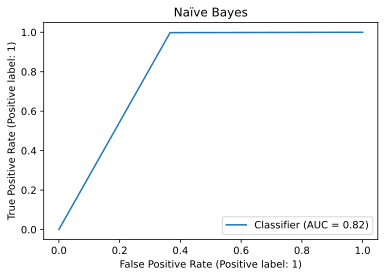

In [126]:
# Plotting ROC Curves
RocCurveDisplay.from_predictions(Y_test, loaded_NB.predict(X_test))
plt.title("Naïve Bayes")

Text(0.5, 1.0, 'Naïve Bayes with text')

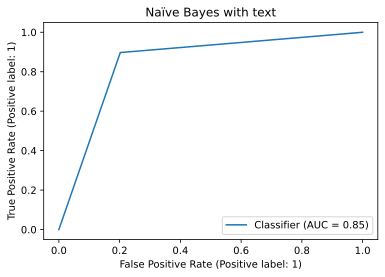

In [127]:
RocCurveDisplay.from_predictions(Y_text_test, loaded_text_NB.predict(X_text_test))
plt.title("Naïve Bayes with text")

## SVM

In [131]:
SVM = SVC()
SVM.fit(X_train, Y_train)
SVM.score(X_test, Y_test)

0.990625

In [132]:
SVM_text = SVC()
SVM_text.fit(X_text_train, Y_text_train)
SVM_text.score(X_text_test, Y_text_test)

0.9223557692307692

In [133]:
# exporting models
filename='./models/SVM.sav'
pickle.dump(knn,open(filename,'wb'))
pickle.dump(knn_text, open('./models/SVM_text.sav','wb'))

In [134]:
loaded_SVM = pickle.load(open('./models/SVM.sav','rb'))
loaded_text_SVM = pickle.load(open('./models/SVM_text.sav','rb'))

In [135]:
fake_test ="Massachusetts Cop’s Wife Busted for Pinning Fake Home-Invasion Robbery on Black Lives Matter Source: PINAC The wife of a Massachusetts cop is facing charges for filing a false police report after she concocted a story about thieves ransacking her home, stealing $10,000 in jewelry and then spray-painting her house with Black Lives Matter to pin it on black people. Maria Daly, wife of Millbury K-9 cop Daniel Daly, took to social media about her dreamt-up victimization after she filed a police report on October 17. “We woke up to not only our house being robbed while we were sleeping, but to see this hatred for no reason,” she posted, according to the Boston Herald. “ If you would of [sic] asked me yesterday about this blue lives and black lives matter issue my response would of [sic] been very positive [sic],” the now private Facebook account alleged. “Today on the other hand I have so much anger and hate that I don’t like myself. This is what we have to deal with these days and it makes me sick that this is what was on the side of my house.” Maria Daly called police to report someone had robbed her home while she was sleeping and then spray-painted her home with BLM for Black Lives Matter then posted about it on social media. Millbury Police Chief Donald Desourcy told the Herald that Daly called police to report an early morning break-in October 17, claiming someone had made off with thousands of dollars worth of valuables and spray-painting “BLM” on the outside of her house. But Chief Desourcy stated that as the investigation unfolded, something didn’t feel “quite right” and Daly ended up admitting she fabricated the whole thing, telling the officers her valuables had already been recovered. “It was pretty obvious. The officers did their due diligence and followed through with the investigation that we had,” he told CBS Boston . “We came to the conclusion it was all fabricated. There was no intruder, there was no burglary.” The chief said the hoax was likely motivated by the couple’s financial troubles and that he has empathy for the family. “I’m very familiar with her and it’s an unfortunate set of circumstances that have taken place.” Daly’s neighbors said it wasn’t a very smart thing to do for a woman who is married to a cop. “She must have tagged the place herself,” said one neighbor. “I don’t know why you’d do that, if you’re gonna stage a robbery, I mean really come on, you’re a cop’s wife. You should know better.” In addition to charges for filing a false police report, Daly also faces a charge for misleading a police investigation. Her cases will be heard at Worcester District Court after she is summoned. Daly’s husband, Daniel Daly was not involved or charged in relation to the hoax, according to police. Share This Article..."
inp = loaded_vectorizer.transform([fake_test])
loaded_SVM.predict(inp)

array([1])

In [136]:
loaded_text_SVM.predict(loaded_text_vectorizer.transform(df_train['newstext'][:2]))

array([1, 0])

In [137]:
print("SVM:")
print(confusion_matrix(Y_test, loaded_SVM.predict(X_test)))
print("SVM with text data:")
print(confusion_matrix(Y_text_test, loaded_text_SVM.predict(X_text_test)))

SVM:
[[1326  766]
 [   4 2064]]
SVM with text data:
[[1666  422]
 [ 213 1859]]


In [138]:
# comparision reports
print("Classification report of SVM:\n\n", classification_report(Y_test, loaded_SVM.predict(X_test)))
print("\n")
print("Classification report of SVM with text:\n\n", classification_report(Y_text_test, loaded_text_SVM.predict(X_text_test)))

Classification report of SVM:

               precision    recall  f1-score   support

           0       1.00      0.63      0.77      2092
           1       0.73      1.00      0.84      2068

    accuracy                           0.81      4160
   macro avg       0.86      0.82      0.81      4160
weighted avg       0.86      0.81      0.81      4160



Classification report of SVM with text:

               precision    recall  f1-score   support

           0       0.89      0.80      0.84      2088
           1       0.81      0.90      0.85      2072

    accuracy                           0.85      4160
   macro avg       0.85      0.85      0.85      4160
weighted avg       0.85      0.85      0.85      4160



Text(0.5, 1.0, 'SVM')

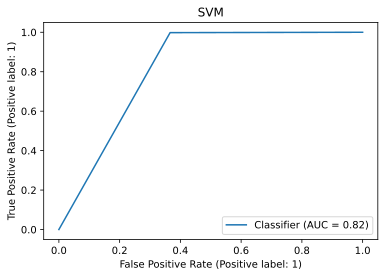

In [139]:
# Plotting ROC Curves
RocCurveDisplay.from_predictions(Y_test, loaded_SVM.predict(X_test))
plt.title("SVM")

Text(0.5, 1.0, 'SVM with text')

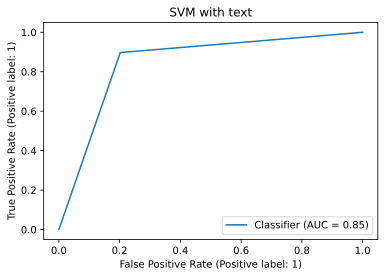

In [140]:
RocCurveDisplay.from_predictions(Y_text_test, loaded_text_SVM.predict(X_text_test))
plt.title("SVM with text")